### You can run this notebook at Colab by clicking here:

<a target="_blank" href="https://colab.research.google.com/github/NMRLipids/databank-template/blob/main/scripts/plotSimulation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Intialize NMRlipids databank

In [ ]:
import sys
import os

# This installs NMRlipids Databank on COLAB environment,
# you can use the same commands on your local machine if you run it locally.

if 'google.colab' in sys.modules:
    !git clone https://github.com/NMRlipids/Databank
    %cd Databank
    !git submodule update --init --remote
    !sed -i '/numpy/s/^/# /' Scripts/DatabankLib/requirements.txt
    !pip3 install .
    os.environ["NMLDB_ROOT_PATH"] = "/content/Databank"

# On local machine, you should set NMLDB_ROOT_PATH to the path where you cloned the repository.
# You can do it either from command line or here by uncommenting the next line:
# os.environ["NMLDB_ROOT_PATH"] = "/path/to/your/Databank"

In [1]:
# These two lines include core Databank routines and Databank API
from DatabankLib.core import *
from DatabankLib.databankLibrary import *
# This is for plotting
from DatabankLib.databankio import *
from DatabankLib.plottings import plotSimulation
from IPython.display import display, Markdown

# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank()

Databank initialized from the folder: /home/comcon1/repo/Databank/Data/Simulations


# Print and plot basic properties of a system selected based on ID number 

In [10]:
# Define a function - simulation report generator
def genReport(ID):
    system = systems.loc(ID)

    ## Get resolved DOI to the stored Simulation
    url = resolve_doi_url(system['DOI'])   
    ## Average area per lipid for the selected simulation
    APL = CalcAreaPerMolecule(system)
    ## Membrane thickness for the selected simulation
    thickness = GetThickness(system)
    ## Lipid hydration level
    hydration = getHydrationLevel(system)
    ## Composition
    comp = dict()
    for lipid in system['COMPOSITION']:
        if lipid not in lipids_set:
            continue
        comp[lipid] = '%.1f' % (calcLipidFraction(system, lipid)*100)

    display(Markdown(f'''
## Report for Simulation  #{ID}  
'''
  )) 
    try:
        display(Markdown(f''' 
Author(s): _{system['AUTHORS_CONTACT']}_  
'''
  )) 
    except:
        pass
    display(Markdown(f'''
Date: _{system['DATEOFRUNNING']}_  
Simulation permanent link: {url}  

- Composition (\%): {':'.join(comp.keys())} ({':'.join(comp.values())})  
- Membrane area per lipid: {APL:.1f} Å$^2$  
- Membrane thickness: {thickness:.1f} nm  
- Hydration level: {hydration:.1f} water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  {
    ", ".join(["%s: %.2f" % (k,v) for k,v in GetEquilibrationTimes(system).items()])
    } ns
'''
                    ))
           
    ## Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible
    display(Markdown('''
### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ \n'''))
    
    for lipid in comp:
        print(lipid)
        plotSimulation(system, lipid)


## Report for Simulation  #830  


 
Author(s): _Eerika Jokinen, Maisa Vuorte, Matti Javanainen_  



Date: _08/04/2025_  
Simulation permanent link: https://doi.org/10.5281/zenodo.15172176  

- Composition (\%): POPC (100.0)  
- Membrane area per lipid: 66.7 Å$^2$  
- Membrane thickness: 4.2 nm  
- Hydration level: 50.0 water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  POPC: 0.28 ns



### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ 


POPC
DOI:  10.5281/zenodo.15172176
Form factor quality:  0.7550000000000001


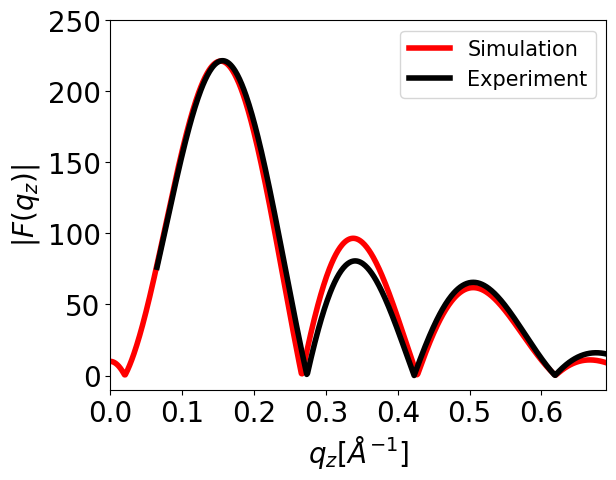

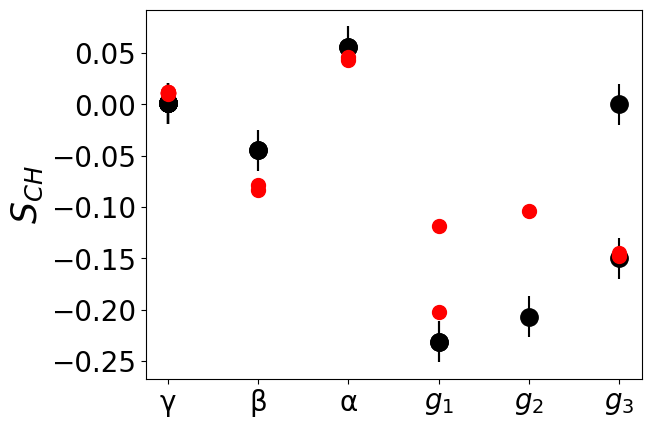

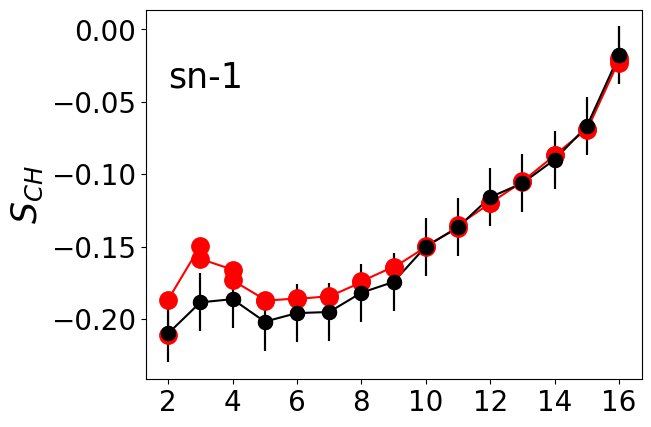

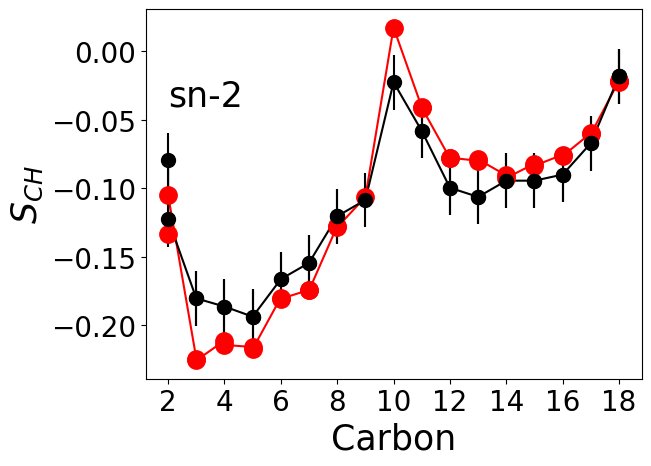

In [11]:
genReport(830)


## Report for Simulation  #831  


 
Author(s): _Eerika Jokinen, Maisa Vuorte, Matti Javanainen_  



Date: _08/04/2025_  
Simulation permanent link: https://doi.org/10.5281/zenodo.15172176  

- Composition (\%): POPC (100.0)  
- Membrane area per lipid: 64.3 Å$^2$  
- Membrane thickness: 4.2 nm  
- Hydration level: 50.0 water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  POPC: 0.45 ns



### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ 


POPC
DOI:  10.5281/zenodo.15172176
Form factor quality:  0.9550000000000003


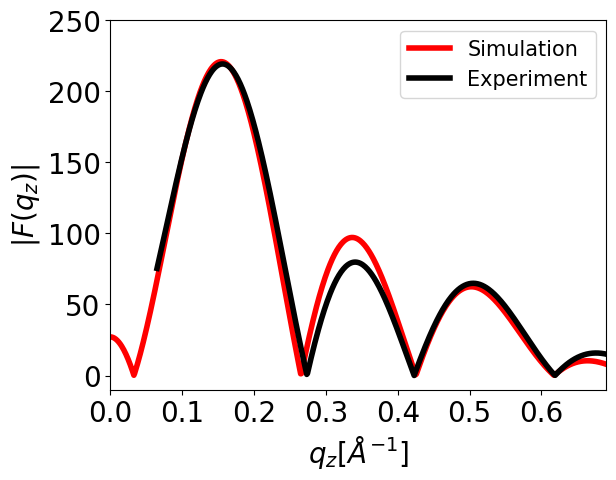

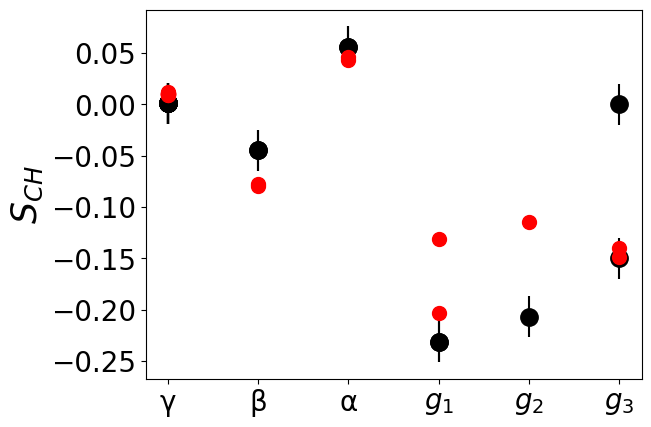

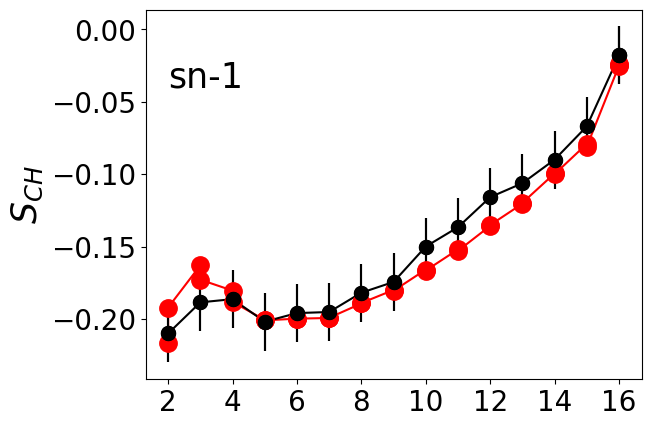

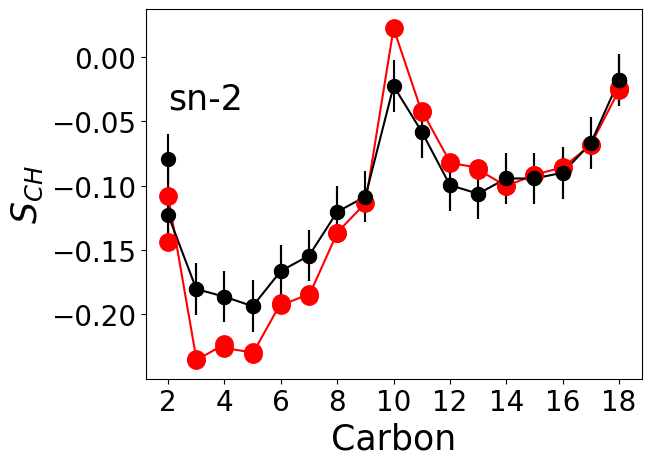

In [12]:
genReport(831)


## Report for Simulation  #376  


 
Author(s): _Antila, Hanne_  



Date: _12/10/2021_  
Simulation permanent link: https://doi.org/10.5281/zenodo.4352287  

- Composition (\%): POPC (100.0)  
- Membrane area per lipid: 67.2 Å$^2$  
- Membrane thickness: 4.0 nm  
- Hydration level: 40.0 water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  POPC: 0.10 ns



### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ 


POPC
DOI:  10.5281/zenodo.4352287
Form factor quality:  0.07800000000000029


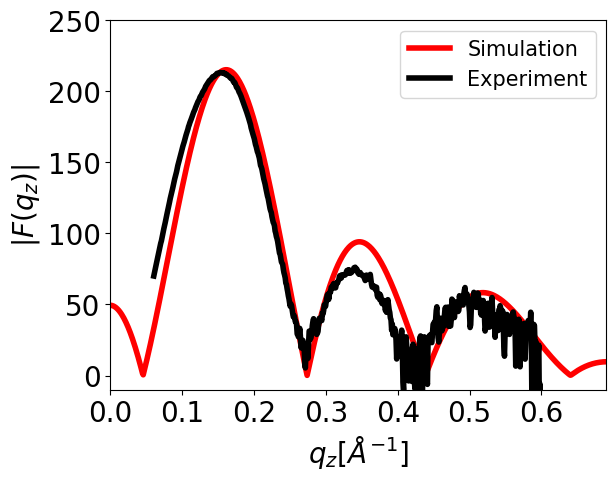

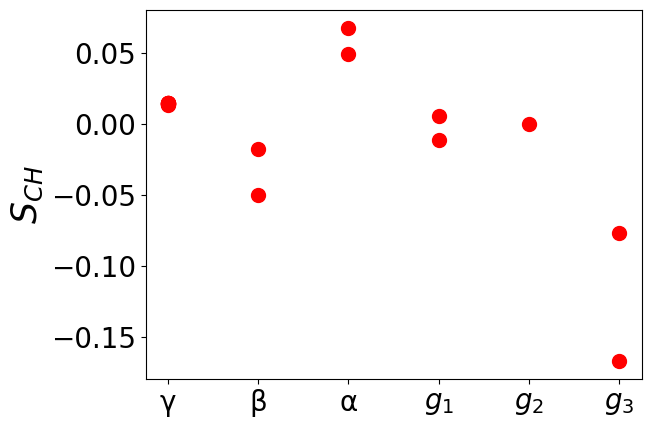

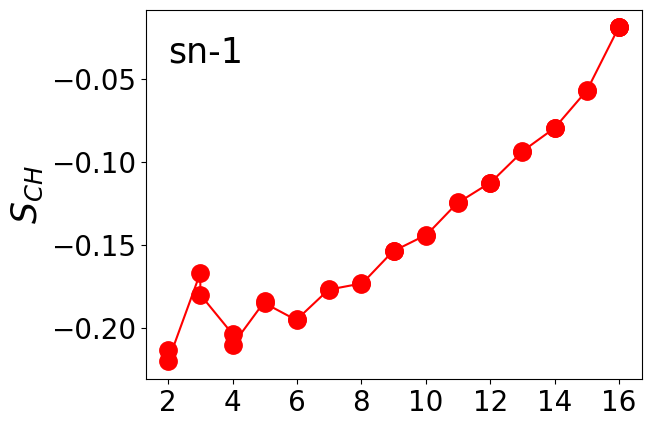

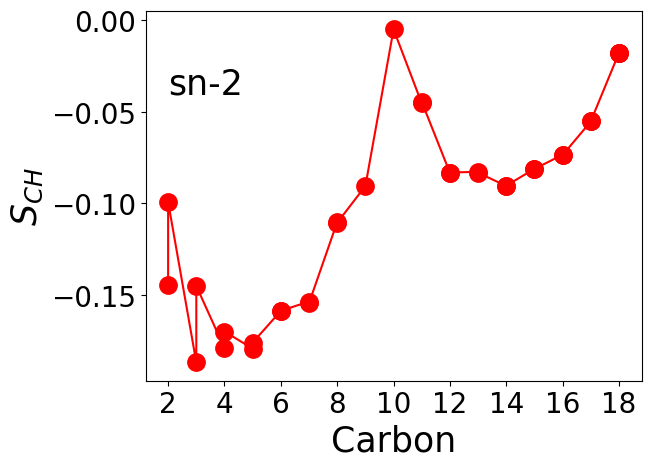

In [13]:
genReport(376)